# Exploratory Data Analysis (EDA) - Kaggle Titanic Dataset

In this notebook, an exploratory data analysis was performed on the Titanic datasets extracted from [Kaggle] with focus on gathering relevant analyses, patterns, and insights. This work is intended to serve as a well-grounded foundation which will be helpful in generating the model to predict the solution goal further down the line.  

I am very happy to present this first project that I have undertaken. I am still a novice in the field of data science and machine learning so any form of feedback and improvements are encouraged and welcomed. I am always looking forward to hear them out and take this opportunity to know more about the ins-and-outs in this field and to further enhance my skills. 

## Specific Objectives
The purpose of the notebook is to practice Exploratory Data Analysis and Visualization in line with going through the following workflow stages:
- **Comprehend.** Understand the nature and relationships among each features in the datasets
- **Correlate.** Validate the strength of association across features with the appopriate statistical tools and metrics based on the distributions and data types of the features.
- **Control.** Identify and remedy the missing/null values. May consider imputing them for features that are deemed significant.  
- **Convert.** Perform the necessary adjustments (i.e. one-hot encoding) to make the datasets appropriate for modelling.
- **Create.** Create new features out of the given features such that they may follow correlation with the solution goal.
- **Conclude.** Generate the final training set with the significantly correlated features ready for modelling.

## Background of the Problem
The complete overview and description of the Kaggle competition be found [here](https://www.kaggle.com/c/titanic). Here are some of information we were provided with the link.
- On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg.
- Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
- While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In [354]:
# data analysis
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Acquire Training and Testing Data

The information regarding the features are explicitly presented [here](https://www.kaggle.com/competitions/titanic/data?select=train.csv) in detail.

In [355]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
test_df_copy = test_df.copy()
df = [train_df, test_df]

test_df_copy.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [356]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [357]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


---

## Exploratory Data Analysis
This stage will focus on comprehending the nature and relationships of the features.

In [358]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [359]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [360]:
len(test_df)/(len(train_df)+len(test_df))

0.31932773109243695

In [361]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [362]:
#test_df.describe()

#### Observations
**Distribution**
- The train-test is split around 70/30, with testing set representing 31.93% of the combined sets.
- The survival rate in context of the training set is at 38.38%, which is representative of the original survival rate of 32.46%, 1502 out of 2224.
- Majority (around 75%) of the people didn't aboard with siblings/spouses
- The distributions of SibSP and Parch are right skewed, since the means are greater than the medians.
**Data Types**
- Numerical: *Age, Sibsp, Parch, Fare*
- Categorical: *Survival, Sex, Pclass, Embarked*
- Mixed/Alphanumeric: *Name, Ticket, Cabin*
**Assumptions**
- **Continuous vs Nominal.** Children (people belonging to lower age brackets) are more likely to survive.
- **Nominal vs Nominal.** Women are more likely to survive than men. 
- **Ordinal vs Nominal.** The higher-echelon and the wealthier classes are more likely to survive.
- **Continuous vs Nominal.** Individuals who travel with larger families have a lower likelihood of surviving.
- **Nominal vs Nominal.** Those who are travel alone have a higher chance of surviving.
- **Nominal vs Nominal.** Are the individuals' port of embarkation associated with their survival?
---

## Analyzing the Numerical Features
For the numerical variables, the seaborn **pairplot** will be helpful in presenting the pariwise relationships across each numerical variables. The diagonal plots are treated as distribution plots to show the distribution of the features.

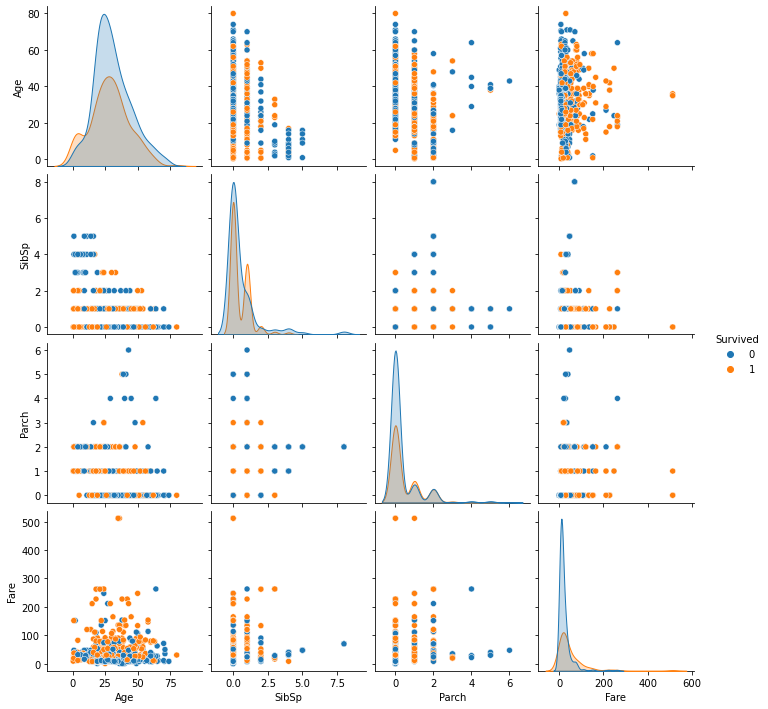

In [363]:
# Separate the training set into groups of numerical and categorical variables.
# Don't worry, the 'Survived' was only included in the numerical category so we can use it to classify the features when we create the pairplot
df_num = train_df[['Age', 'Survived', 'SibSp', 'Parch', 'Fare']]
df_cat = train_df[['Survived', 'Pclass', 'Sex', 'Embarked']]

# Classify by 'Survived'
sns.pairplot(df_num, hue='Survived')

**Age**
- More normally distributed compared to the rest.
- Majority of passengers fall in the 15-35 age bracket.
- A large number of 25 yr olds didn't survive.
- Infants (age<4) had a higher survival rate.
- The oldest individual (age=80) survived.

**SibSp.**
- Skewed to the right.
- Those with 1-2 siblings/spouses were likely to survive.
- Large number of passengers didn't have siblings/spouses with them.
- An outlier, with over 8 siblings/spouses, didn't survive.

**Parch.**
- Skewed to the right.
- Large number of passengers didn't have parents/children with them.
- Passengers without parents and children with them were more likely to die.

**Fare.**
- Skewed to the right.
- Majority of the passengers aboarded with cheaper fares.
- Most passengers with cheaper fares (<50) didn't survive, while those who paid higher fares (>300) tend to survive.

<AxesSubplot:>

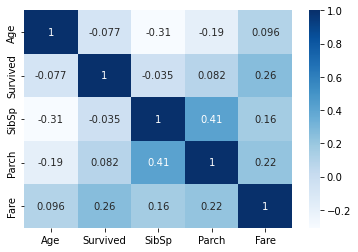

In [364]:
## Correlation Matrix
sns.heatmap(df_num.corr(), cmap='Blues', annot=True)

#### Observations
- Parch and SibSp features a positively moderate correlation.
- Parch and Fare has a positively weak correlation.
- We noticed that 'Age' has a very weak correlation with our solution goal despite following a normal distribution.

#### Decisions
- We can try normalizing the skewed distributions of 'SibSp', 'Parch', and 'Fare' to see if it improves the correlations.

### Normalizing the Numerical Features Distributions
The **probability plot** or **quantile-quntile plot (QQplot)** allows us to plot our sample data against the quantiles of a normal distribution. This will serve as reference to see how our subsequent data transformations react to the curve, and enable us to select the best form of transformation which resulted to the best fit.

We can try use the following data transformation techniques:
- Square Root
- Cube Root
- Logarithmic. **Log(x+1)** wil ensure the log transformation won't result in undefined values.
> *Reciprocal Transformation* can't be used because our data contain 'zero' values, which would result in undefined values.

In [365]:
import scipy.stats as stats

# Defining the function to generate the distribution plot alongside QQplot
def QQplot(df, col):
    plt.figure(figsize = (9, 3))
    plt.subplot(1,2,1)
    sns.histplot(df[col].dropna(), kde=True)
    
    plt.subplot(1,2,2)
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)

#### Normalizing Age

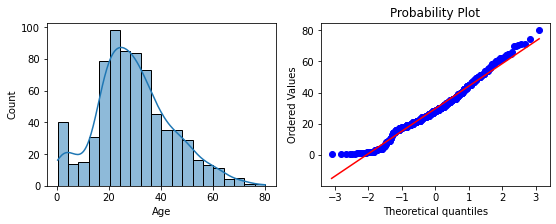

In [366]:
df_num = train_df[['Age', 'SibSp', 'Parch', 'Fare']]
QQplot(df_num, 'Age')

#### Normalizing SibSp

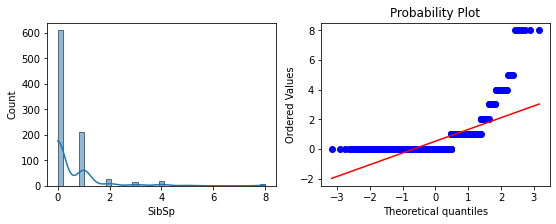

In [367]:
QQplot(df_num, 'SibSp')

C:\Users\NAUT1S~1\AppData\Local\Temp/ipykernel_4380/1686086859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["SibSp_sqrt"] = df_num['SibSp']**(1./2)
C:\Users\NAUT1S~1\AppData\Local\Temp/ipykernel_4380/1686086859.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["SibSp_cbrt"] = df_num['SibSp']**(1./3)
C:\Users\NAUT1S~1\AppData\Local\Temp/ipykernel_4380/1686086859.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

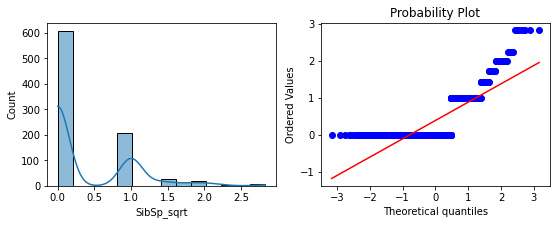

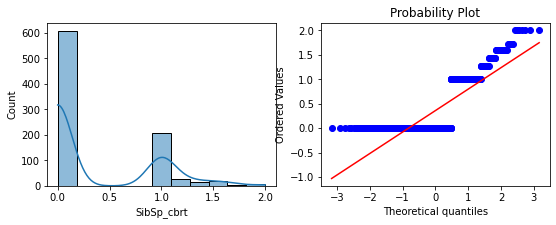

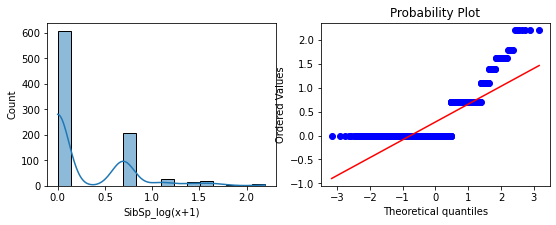

In [368]:
# Perform data transformations and generate QQplots
df_num["SibSp_sqrt"] = df_num['SibSp']**(1./2)
QQplot(df_num, 'SibSp_sqrt')

df_num["SibSp_cbrt"] = df_num['SibSp']**(1./3)
QQplot(df_num, 'SibSp_cbrt')

df_num["SibSp_log(x+1)"] = np.log(df_num['SibSp'] + 1)
QQplot(df_num, 'SibSp_log(x+1)')

# df_num["SibSp_YeoJohn"] = stats.yeojohnson(df_num['SibSp'])
# QQplot(df_num, 'SibSp_YeoJohn')

#### Normalizing Parch

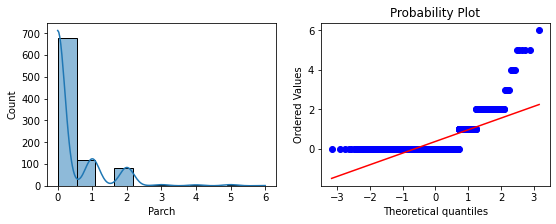

In [369]:
QQplot(df_num, 'Parch')

C:\Users\NAUT1S~1\AppData\Local\Temp/ipykernel_4380/3126844561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["Parch_sqrt"] = df_num['Parch']**(1./2)
C:\Users\NAUT1S~1\AppData\Local\Temp/ipykernel_4380/3126844561.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["Parch_cbrt"] = df_num['Parch']**(1./3)
C:\Users\NAUT1S~1\AppData\Local\Temp/ipykernel_4380/3126844561.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

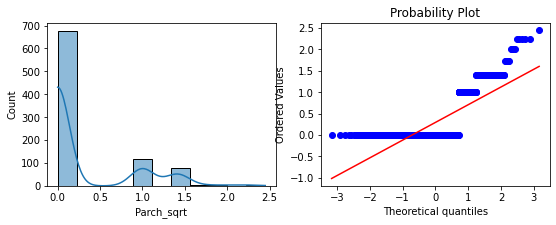

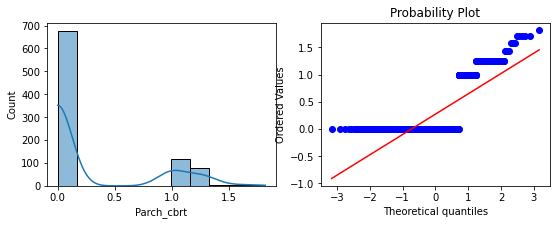

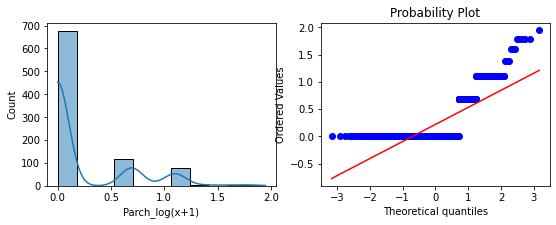

In [370]:
# Perform data transformations and generate QQplots
df_num["Parch_sqrt"] = df_num['Parch']**(1./2)
QQplot(df_num, 'Parch_sqrt')

df_num["Parch_cbrt"] = df_num['Parch']**(1./3)
QQplot(df_num, 'Parch_cbrt')

df_num["Parch_log(x+1)"] = np.log(df_num['Parch'] + 1)
QQplot(df_num, 'Parch_log(x+1)')

#### Normalizing Fare

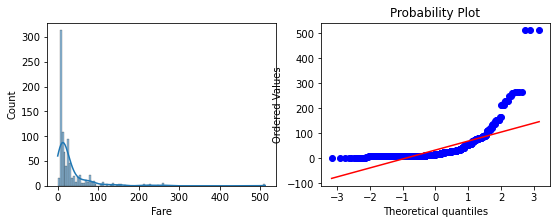

In [371]:
QQplot(df_num, 'Fare')

C:\Users\NAUT1S~1\AppData\Local\Temp/ipykernel_4380/1441105713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["Fare_sqrt"] = df_num['Fare']**(1./2)


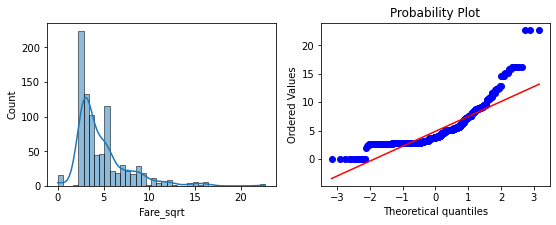

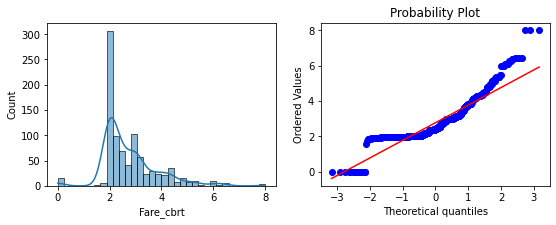

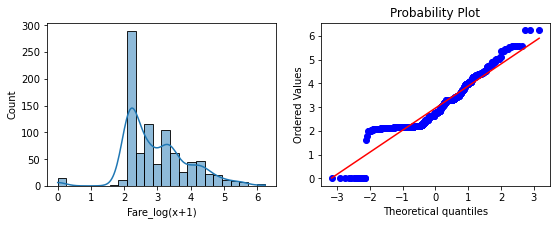

In [372]:
# Perform data transformations and generate QQplots
df_num["Fare_sqrt"] = df_num['Fare']**(1./2)
QQplot(df_num, 'Fare_sqrt')

df_num["Fare_cbrt"] = df_num['Fare']**(1./3)
QQplot(df_num, 'Fare_cbrt')

df_num["Fare_log(x+1)"] = np.log(df_num['Fare'] + 1)
QQplot(df_num, 'Fare_log(x+1)')

#### Observations
- **Age.** Normally distributed. No need to transform.
- **SibSp.** Still highly skewed. 
- **Parch.** Still highly skewed.
- **Fare.** The log(x+1) transformation yielded the best fit.

#### Decisions
- Peform log(x+1) transformation on 'Fare' feature.
- Create a new 'Family' feature which combines the numbers in 'SibSp' and 'Parch'.
- Assess if 'Family' is normally distributed and correlated with the solution goal.

### Creating ''Family' Feature

In [373]:
df_num = train_df[['Age', 'Survived', 'SibSp', 'Parch', 'Fare']]
df_num['Family'] = df_num['SibSp'] + df_num['Parch']
df_num.head()

C:\Users\NAUT1S~1\AppData\Local\Temp/ipykernel_4380/1073211787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Family'] = df_num['SibSp'] + df_num['Parch']


,Age,Survived,SibSp,Parch,Fare,Family
0,22.0,0,1,0,7.2500,1
1,38.0,1,1,0,71.2833,1
2,26.0,1,0,0,7.9250,0
3,35.0,1,1,0,53.1000,1
4,35.0,0,0,0,8.0500,0


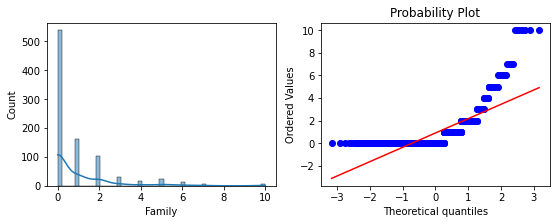

In [374]:
QQplot(df_num, 'Family')

In [375]:
# # Perform data transformations and generate QQplots
# df_num["Family_sqrt"] = df_num['Family']**(1./2)
# QQplot(df_num, 'Family_sqrt')

# df_num["Family_cbrt"] = df_num['Family']**(1./3)
# QQplot(df_num, 'Family_cbrt')

# df_num["Family_log(x+1)"] = np.log(df_num['Family'] + 1)
# QQplot(df_num, 'Family_log(x+1)')

<AxesSubplot:>

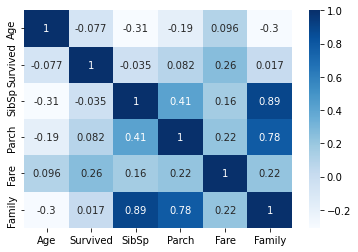

In [376]:
## Correlation Matrix
sns.heatmap(df_num.corr(), cmap='Blues', annot=True)

#### Observations
- After transforming the 'Fare' feature, its correlation with solution goal improved from 0.26 to 0.33.
- It appears that the 'Family' feature didn't improve the correlation.
- 'Age' has a very underwhelming correlation with the solution goal, only at -0..07.

#### Decisions
- Let's create a new categorical feature called 'withFamily' based on 'Family' where we set values to (0 = without family) and (1 = with family). Validate the correlation
- We can drop the 'SibSp' and 'Parch' features as they are no longer relevant.
- Complete the missing values in 'Age'. Validate the correlation.

### Completing Missing Values in 'Age'
- The null values comprise around 20% of the sample, so it is more appropriate to perform imputations than removing them.
- Let's impute the missing values by getting the mean of the current 'Age' dataset since we know that the data is normally distributed.

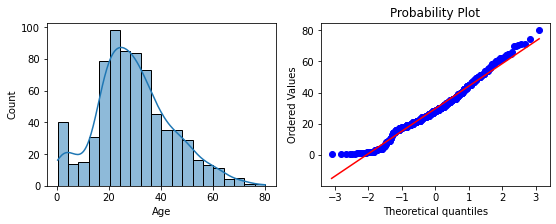

In [377]:
Age_mean = df_num['Age'].mean()

df_num['Age'].fillna(Age_mean)
QQplot(df_num, 'Age')

### Converting 'Age' into 'AgeGroup'

In [378]:
df_num['AgeGroup'] = pd.cut(df_num['Age'], 5)
df_num[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index=False).mean()

C:\Users\NAUT1S~1\AppData\Local\Temp/ipykernel_4380/1937231321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['AgeGroup'] = pd.cut(df_num['Age'], 5)


,AgeGroup,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


> Let's now treat 'AgeGroup' as a categorical variable, and validate its correlation.

In [379]:
# df_num['Age'].where(df_num['Age'] <= 16, 0)
# df_num['Age'].where((df_num['Age'] > 16) & (df_num['Age'] <= 32), 1)
# df_num['Age'].where((df_num['Age'] > 32) & (df_num['Age'] <= 48), 2)
# df_num['Age'].where((df_num['Age'] > 48) & (df_num['Age'] <= 64), 3)
# df_num['Age'].where((df_num['Age'] > 64), 4)

# df_num

### Creating Categorical 'withFamily' Feature

In [380]:
for dataset in df:
    
    # Create 'withFamily' feature
    dataset['Family'] = dataset['SibSp'] + dataset['Parch']
    dataset['withFamily'] = 0
    dataset.loc[dataset['Family'] >= 1, 'withFamily'] = 1
    
    # Drop 'SibSp' and 'Parch' features
    
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family,withFamily
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602,0.397306
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459,0.489615
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000


In [381]:
df_cat = train_df[['Survived', 'Pclass', 'Sex', 'Embarked', 'withFamily']]

---
## Analyzing the Categorical Features
For categorical features, we can visualize them through **countplots.**

<AxesSubplot:xlabel='withFamily', ylabel='count'>

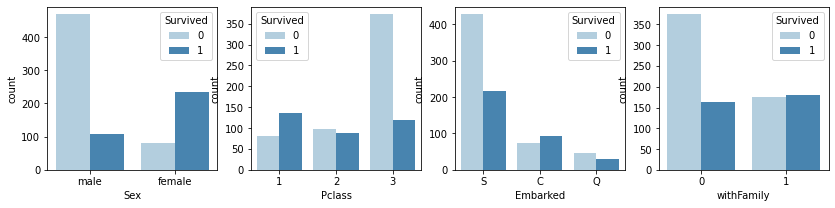

In [382]:
plt.figure(figsize= (14, 3))

#Sex
plt.subplot(1, 4, 1)
sns.countplot(x='Sex', data=df_cat, hue='Survived', palette='Blues')

#Pclass
plt.subplot(1, 4, 2)
sns.countplot(x='Pclass', data=df_cat, hue='Survived', palette='Blues')

#Embarked
plt.subplot(1, 4, 3)
sns.countplot(x='Embarked', data=df_cat, hue='Survived', palette='Blues')

#withFamily
plt.subplot(1, 4, 4)
sns.countplot(x='withFamily', data=df_cat, hue='Survived', palette='Blues') 

#### Observations
**Sex**
- More males were on board.
- Females had a higher survival rate than males did.
**Pclass**
- Most of the passengers are in Pclass 3. 
- Pclass 3 had the least survival rate than with Pclasses 1 and 2.
- Pclass 1 is the only class with more survived passengers than dead passengers.
**Embarked**
- A major chunk of the passengers embarked from Southampton, and the least from Queensland.
- The sample of those embarked from Cherbourg had more survived than dead passengers.
**WithFamily**
- Those who aboarded alone are likely to die than those with their families.
> *"There is nothing stronger than family." - Dom* 

#### Decisions
- Validate the orrelations of 'Sex', 'Pclass', 'Embarked', and 'withFamily' with solution goal.
- Create a new categorical feature 'Title' by extracting the titles from the given names of the passengers. Validate correlation.
- Create a new categorical feature 'Unit' by extracting the units (i.e. letters, numbers) from the cabin numbers. Validate correlation.

### Correlating the Categorical Features

- When determining the strength of association between two discrete nominal variables (i.e. 'Sex' vs 'Survived'), we can represent the dataset in the form of a **2x2 contingency table** and measure the correlation using **phi  coefficient.** We will use this for evaluating 'Sex', 'Embarked', and 'withFamily'.
- When considering between ordinal vs nominal variables (i.e. 'Pclass' vs 'Survived'), determining the [rank-biserial correlation coefficient](https://www.statisticshowto.com/rank-biserial-correlation/) or the Spearman's correlation is the more appropriate strategy. We will use this for evaluating 'Pclass'.

In [383]:
pd.pivot_table(train_df, columns='Survived', index=['Sex'], values='Ticket', aggfunc='count')

Survived,0,1
Sex,,
female,81,233
male,468,109


In [384]:
pd.pivot_table(train_df, columns='Survived', index=['Embarked'], values='Ticket', aggfunc='count')

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [385]:
pd.pivot_table(train_df, columns='Survived', index=['withFamily'], values='Ticket', aggfunc='count')

Survived,0,1
withFamily,,
0,374,163
1,175,179


In [386]:
# Computing for the correlation coefficients using the Cramer's V method.
from scipy.stats.contingency import association

# Constructing the 2x2 contingency table represented in terms of arrays
obs_Sex = np.array([[81, 233],
                   [468, 109]])

# Cramer's V method
association(obs_Sex, method='cramer')

0.5433513806577551

In [387]:
obs_Embark = np.array([[75, 93],
                   [47, 30],
                  [427, 217]])

association(obs_Embark, method='cramer')

0.17261682709984438

In [388]:
obs_withFam = np.array([[374, 163],
                   [175, 179]])

association(obs_withFam, method='cramer')

0.20336708569989195

In [389]:
# Formula for the Rank-Biserail Correlation.
# rbc = 2 * (Y1 – Y0) / n
    # n = number of data pairs in the sample,
    # Y0 = Y score means for data pairs with x = 0,
    # Y1 = Y score means for data pairs with x = 1.

# rbc = 2 * (train_df.loc[train_df['Survived'] == 1, 'Pclass'].mean() - 
#            train_df.loc[train_df['Survived'] == 0, 'Pclass'].mean() )/ len(train_df)

train_df.loc[train_df['Survived'] == 1, 'Pclass'].mean()
# train_df.loc[train_df['Survived'] == 0, 'Pclass'].mean()

Pclass_df = train_df[['Survived', 'Pclass']]

from scipy.stats import spearmanr
spearmanr(Pclass_df)

SpearmanrResult(correlation=-0.33966793665005257, pvalue=1.6876081409966053e-25)

#### Observations
- **Sex**. A coefficient of 0.54 suggests a moderately strong association between 'Sex' and the solution goal.
- **Embarked**. A coefficient of 0.17 suggests a weak association.
- **withFamily**. A coefficient of 0.20 suggests a weak association; nonetheless, the correlation is way higher than when represented as continuous variable in terms of 'Family'.
- **Pclass**. A Spearman coefficient of -0.34 suggests a weak correlatation.

### Analyzing 'Name' and 'Cabin'

- Does a passenger's title relate to survival rates?
- Does the cabin unit *(extract first letter from alphanumeric string)*  affect survival rates?

In [390]:
df_cat = train_df[['Name', 'Survived', 'Cabin']]
df_cat.head()

,Name,Survived,Cabin
0,"Braund, Mr. Owen Harris",0,NaN
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,C85
2,"Heikkinen, Miss. Laina",1,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,C123
4,"Allen, Mr. William Henry",0,NaN


In [391]:
# Analyzing 'Name'

# Split the full name into a list by comma, then return the title by indexing the 2nd position [1]
# Split the name into a list by period, then return the title by indexing the 1st position [0]
df_cat['Title'] = df_cat['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df_cat.head()

C:\Users\NAUT1S~1\AppData\Local\Temp/ipykernel_4380/2915615596.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Title'] = df_cat['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())


,Name,Survived,Cabin,Title
0,"Braund, Mr. Owen Harris",0,NaN,Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,C85,Mrs
2,"Heikkinen, Miss. Laina",1,NaN,Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,C123,Mrs
4,"Allen, Mr. William Henry",0,NaN,Mr


In [392]:
df_cat['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [393]:
df_cat[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


<AxesSubplot:xlabel='Title', ylabel='count'>

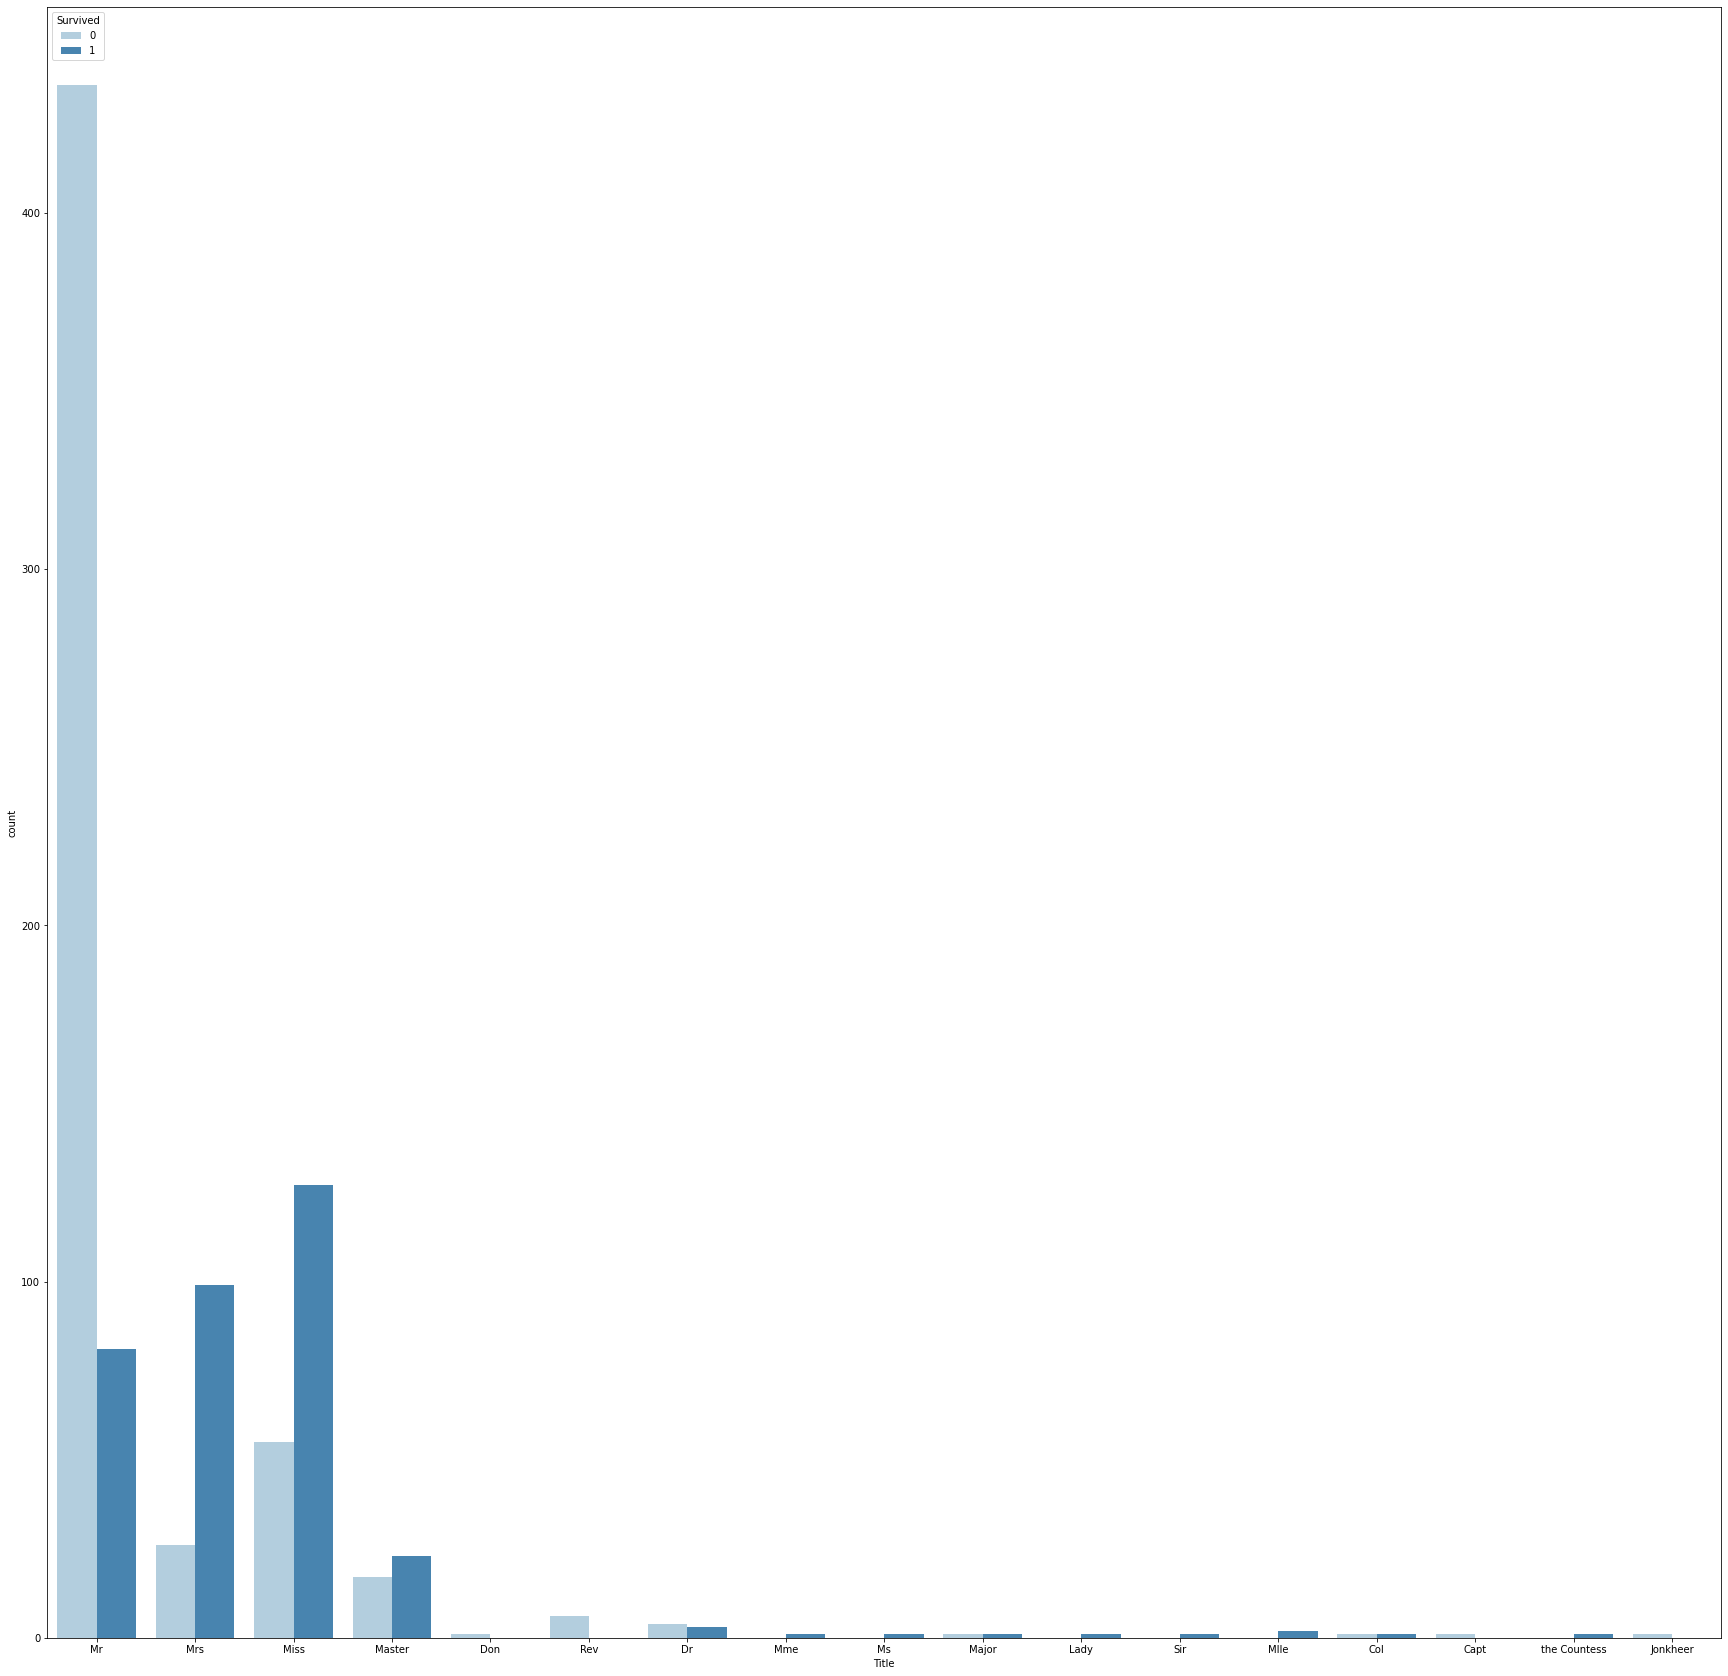

In [394]:
plt.figure(figsize=(30,30))
sns.countplot(x='Title', data=df_cat, hue='Survived', palette='Blues')

**Prefixes Meaning**
- **Rev.** Ministers of most Christian denominations; ordained clergymen since 17th century.
- **Mlle and Miss.** Unmarried female; young lady.
- **Mme.** Woman
- **Master, Major, and Don.** Lord, master, or owner (of a household).
- **Col.** Colonel; army officer of high rank.
- **the Countess.** Wife or widow of a count.
- **Capt.** could refer to the captain of the ship.
- **Ms.** Any women regardless of marital status.
- **Lady.** Princesses or daughters of royal blood.
- **Jonkheer.** Female equivalent denoting the lowest rank within the nobility.
**Classify Titles**
- Mlle and Ms > Miss
- Mme > Mrs
- Uncommon titles will be treated as a new category > Others

In [395]:
for dataset in df:
    dataset['Title'] = dataset['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Returns the unique 'titles' from the dataset
Unique_titles = np.union1d(train_df['Title'].unique(), test_df['Title'].unique())
Unique_titles

array(['Capt', 'Col', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major',
       'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir',
       'the Countess'], dtype=object)

In [396]:
for dataset in df:
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir','the Countess'], 'Others')
    
print(train_df['Title'].unique())
print(test_df['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Others']
['Mr' 'Mrs' 'Miss' 'Master' 'Others']


<AxesSubplot:xlabel='Title', ylabel='count'>

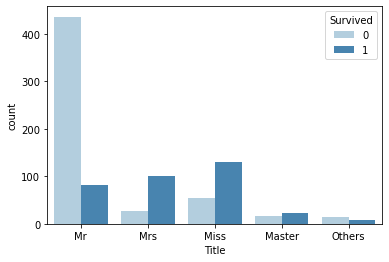

In [397]:
sns.countplot(x='Title', data=train_df, hue='Survived', palette='Blues')

**Titles**
- The Title feature also justifies the correlation between 'Sex' and 'Survived'.
- The 'Others' category compiles a very small sample of the given dataset. Despite these titles having characterized of nobile status, it appears that they were trivial at the time of the crisis.

In [398]:
# Analyzing 'Cabin'
df_cat['CabinUnit'] = df_cat['Cabin'].apply(lambda x: str(x)[0])
df_cat['CabinUnit'].value_counts()
df_cat[['CabinUnit', 'Survived']].groupby(['CabinUnit'], as_index=False).mean().sort_values(by='Survived', ascending=False)

C:\Users\NAUT1S~1\AppData\Local\Temp/ipykernel_4380/4234790963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['CabinUnit'] = df_cat['Cabin'].apply(lambda x: str(x)[0])


,CabinUnit,Survived
3,D,0.757576
4,E,0.750000
1,B,0.744681
5,F,0.615385
2,C,0.593220
6,G,0.500000
0,A,0.466667
8,n,0.299854
7,T,0.000000


> Note that null values will be treated as a category, denoted as CabinUnit 'n'. 

In [399]:
pd.pivot_table(df_cat, index='CabinUnit', columns='Survived', values='Name', aggfunc='count')

Survived,0,1
CabinUnit,,
A,8.0,7.0
B,12.0,35.0
C,24.0,35.0
D,8.0,25.0
E,8.0,24.0
F,5.0,8.0
G,2.0,2.0
T,1.0,NaN
n,481.0,206.0


<AxesSubplot:xlabel='CabinUnit', ylabel='count'>

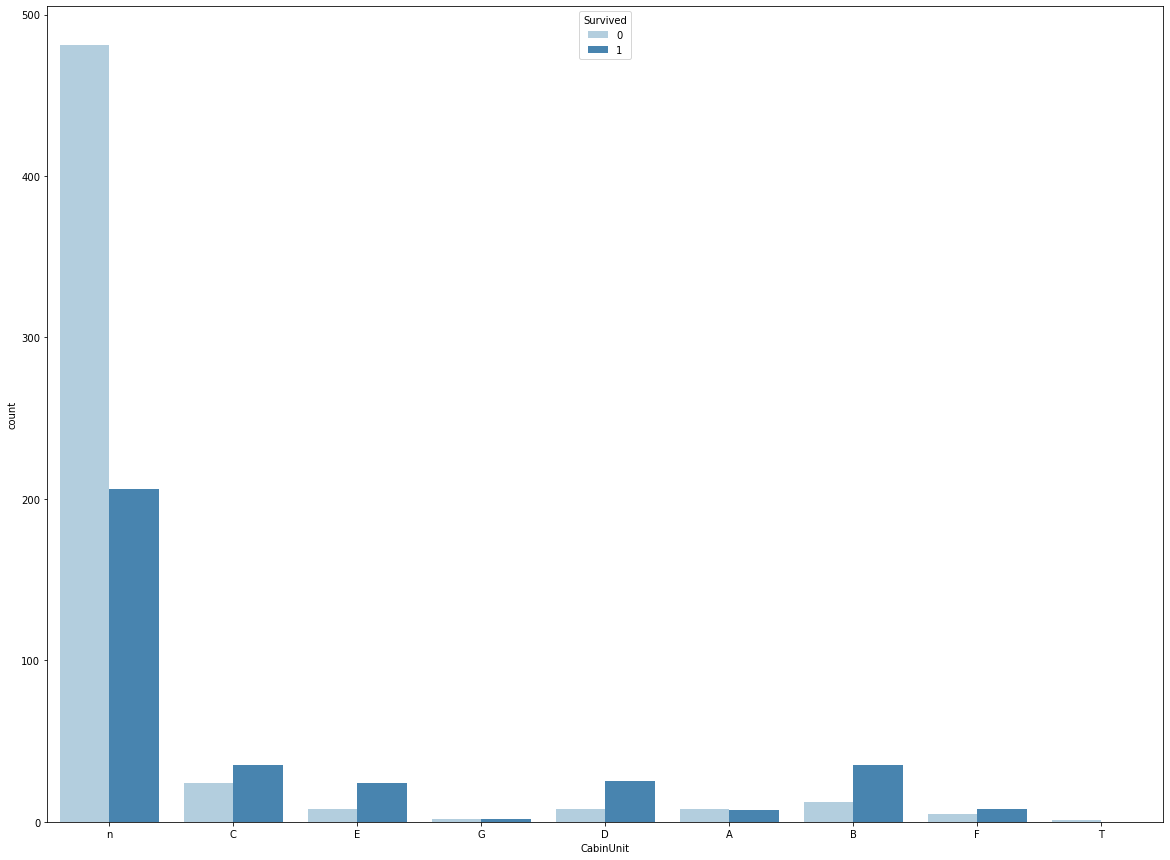

In [400]:
plt.figure(figsize=(20,15))
sns.countplot(x='CabinUnit', data=df_cat, hue='Survived', palette='Blues')

**Cabin Unit.**
- The abundance of missing values makes it difficult to be representative as a sample.
- Deck/Cabin A was known as the Pomegrande, which is located at the superstructure of Titanic. The assumption that Cabin A would have a higher survival rate, however, isn't justified by our data. Hence, Cabin Unit column shall be removed.

---
## Data Wrangling
- Drop null values from 'Embark' in datasets.
- Remove 'SibSp', 'Parch', 'Passengerid', 'Family', 'Cabin'
- Impute missing values in training 'Age' with mean. because it follows normal distribution.
- Impute missing values in testing 'Fare' with median, because it is skewed.
- Normalize 'Fare' through log transformation.
- Drop irrelevant features 'Name', 'Cabin', and 'Ticket'.
- Perform **one-hot encoding** with pd.get_dummies

In [401]:
for dataset in df:
    dataset.dropna(subset=['Embarked'], inplace=True)
    
df = [train_df, test_df]

print(train_df.shape, test_df.shape)

(889, 15) (418, 14)


In [402]:
for dataset in df:
    dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())
    dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median())
    print(dataset.Age.isnull().sum())
    print(dataset.Fare.isnull().sum())

0
0
0
0


In [403]:
for dataset in df:
    dataset['Fare'] = np.log(dataset['Fare'] + 1)

In [404]:
# Dropping irrelevant column features
train_df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Family', 'Cabin'], inplace=True, axis=1)
test_df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Family', 'Cabin'], inplace=True, axis=1)
df = [train_df, test_df]

In [405]:
# Creating dummy indicator columns for categorical variables
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked', 'withFamily', 'Title'])
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked', 'withFamily','Title'])

train_df.head()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,withFamily_0,withFamily_1,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,0,3,22.0,2.110213,0,1,0,0,1,0,1,0,0,1,0,0
1,1,1,38.0,4.280593,1,0,1,0,0,0,1,0,0,0,1,0
2,1,3,26.0,2.188856,1,0,0,0,1,1,0,0,1,0,0,0
3,1,1,35.0,3.990834,1,0,0,0,1,0,1,0,0,0,1,0
4,0,3,35.0,2.202765,0,1,0,0,1,1,0,0,0,1,0,0


---
## Model Evaluation
Now that we have completed the data preparation, we can now begin training our model and predict our solution goal. Since we are working with a given dataset with a predetermined solution goal, we are running a form of machine learning algorithm known as supervised learning. With that, here are some of the few models we can run and see how each of them perform based on accuracy.
- Logistic Regression
- Support Vector Machines (SVM)
- K-Means Nearest Neighbors (KNN)
- Decision Tree

In [406]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df

In [407]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
logreg_acc = round(logreg.score(X_train, Y_train)*100, 2)
logreg_acc

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


81.21

In [408]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
svc_acc = round(svc.score(X_train, Y_train)*100, 2)
svc_acc

77.39

In [409]:
# K-Means Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
knn_acc = round(knn.score(X_train, Y_train)*100, 2)
knn_acc

84.48

In [410]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
Y_pred = tree.predict(X_test)
tree_acc = round(tree.score(X_train, Y_train)*100, 2) 
tree_acc

98.43

In [415]:
# Generating the csv file for submission to Kaggle competition
result = pd.DataFrame({
    "PassengerId": test_df_copy["PassengerId"],
    "Survived": Y_pred
})

result.to_csv('Submission - Titanic.csv')

In [412]:
test_df_copy

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
